# MTH9875 Homework 1 

Assigned: September 7, 2017.
Due: September 14, 2017 by 6pm.

Late homework **will not be accepted**.

# Chendi Zhang

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

## Power laws

$$\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
$$
#### 1. (4 points)

Let $X_i$ be independent power-law distributed random variables, so that for large $x$,

$$
\Pr(X_i>x) \sim \frac{1}{x^{\zeta_{X_i}}} 
$$

 Prove the following properties of the tail exponents $\zeta_{X_i}$:

 (a) $$
\zeta_{X^\alpha}=\frac{\zeta_{X}}{\alpha}%\label{eq:PLpower}
$$

(b) $$
\zeta_{\alpha\,X}=\zeta_{X}
%\label{eq:PLprod}
$$



### Answer
(a)
Because
$$\Pr(X^\alpha\,>\,x) = \Pr(X\,>\,x^{\frac1{\alpha}})$$
$$\Pr(X\,>\,x^{\frac1{\alpha}})\sim \frac{1}{x^{\frac{\zeta_{X}}{\alpha}}} $$,
$$\zeta_{X^\alpha}=\frac{\zeta_{X}}{\alpha}%\label{eq:PLpower}$$

(b)
Because
$$\Pr(\alpha\,X\,>\,x) = \Pr(X\,>\,\frac{x}{\alpha})$$
$$\Pr(X\,>\,\frac{x}{\alpha}) \sim \frac{\alpha^{\zeta_{X}}}{x^{\zeta_{X}}} \sim \frac{1}{x^{\zeta_{X}}}$$,
$$\zeta_{\alpha\,X}=\zeta_{X}%\label{eq:PLprod}$$


The following code snippet loads the data required for the remaining homework assignments below.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/08/9875HW01_Fall2016.zip", destfile="9875HW1.zip")
unzip(zipfile="9875HW1.zip")

#### 2. (8 points)

(a) Convert the file `SSRN.csv` (which contains paper download numbers and ranks) to a data frame.

(b) Draw a log-log plot of number of paper downloads ($y$) vs download rank ($x$).

(c) Regress $y$ vs $x$ and superimpose the resulting fit on your plot from part (b).

(d) Write down the empirical power-law you have found in the form

$$
y = C x^\alpha.
$$

### Answer

In [2]:
#2(a)
SSRN = read.csv('SSRN.csv')
head(SSRN)

Rank,Author,Total.New.Downloads
1,"Fernandez, Pablo",139046
2,"Jensen, Michael C.",66341
3,"Jackson, Matthew O.",41335
4,"Faber, Mebane T.",37648
5,"Damodaran, Aswath",35219
6,"Harvey, Campbell R.",33425


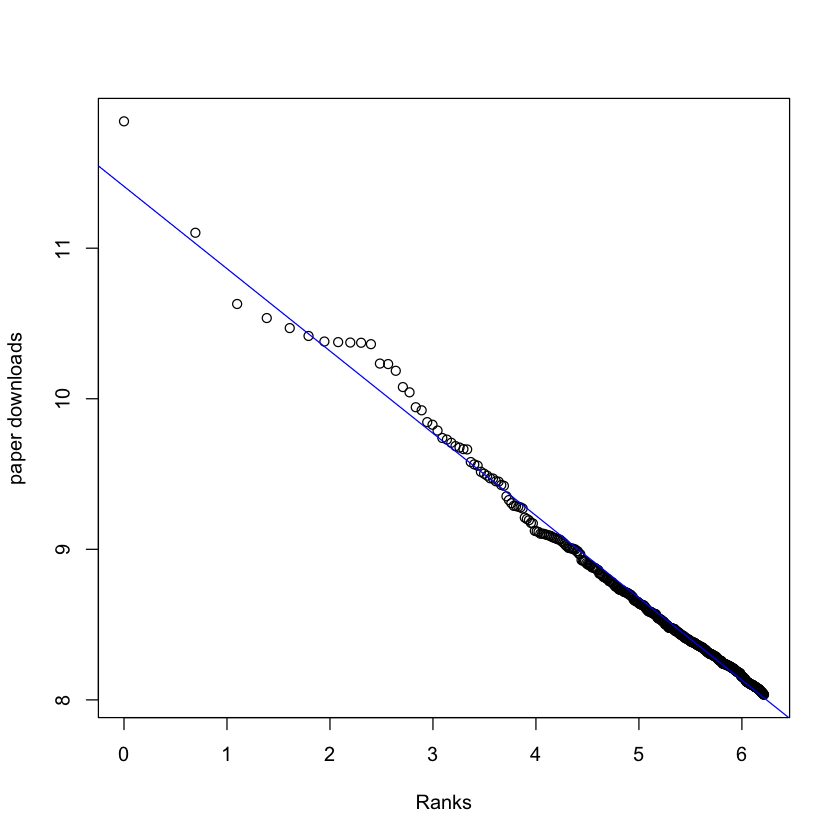

In [3]:
# 2(b)
plot(log(SSRN$Rank), log(SSRN$Total.New.Downloads), ylab = "paper downloads", xlab = "Ranks")
# 2(c)
lm <- lm(log(SSRN$Total.New.Downloads) ~ log(SSRN$Rank)) 
abline(lm, col = "blue")

In [4]:
# 2(d)
C = exp( lm$coefficients[1] )
C
alpha = lm$coefficients[2]
alpha

(Intercept) 
   90312.34

log(SSRN$Rank) 
     -0.546707

The empirical power-law is in the form of
$$y = 90312.34\,x^{-0.5467}$$

#### 3. (8 points)

Repeat all four parts of question 2. for the dataset `Cities.csv`.

### Answer

In [5]:
# 3(a)
Cities = read.csv("Cities.csv")
head(Cities)

Rank,Municipality,State,X2000.Population,X1990.Population,Change.in.Population
1,New York city,New York,8008278,7322564,9.40%
2,Los Angeles city,California,3694820,3485398,6.00%
3,Chicago city,Illinois,2896016,2783726,4.00%
4,Houston city,Texas,1953631,1630553,19.80%
5,Philadelphia city,Pennsylvania,1517550,1585577,-4.30%
6,Phoenix city,Arizona,1321045,983403,34.30%


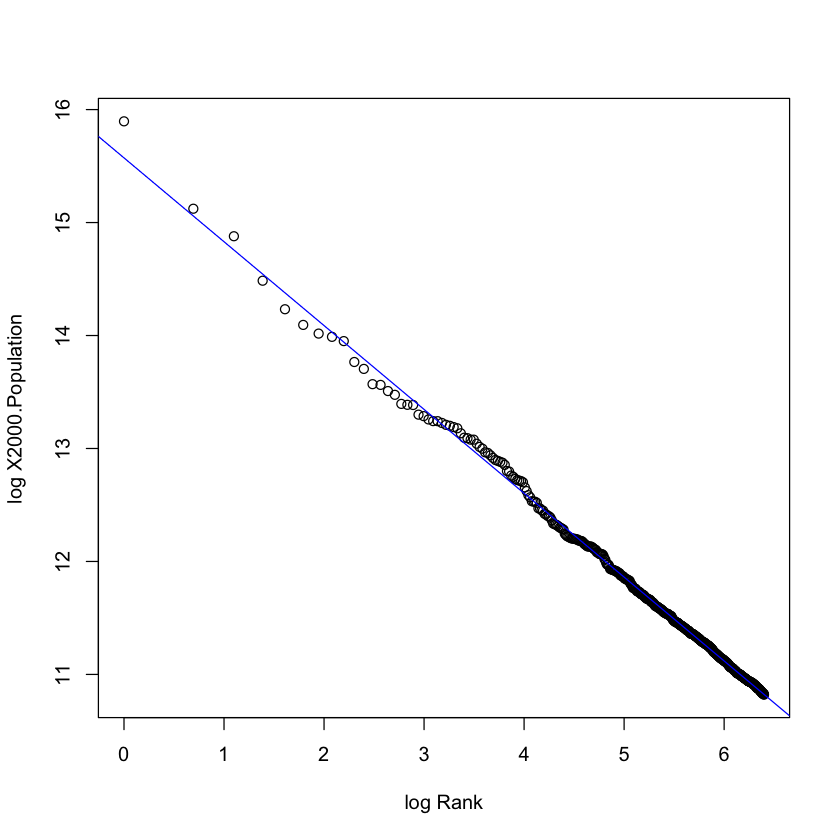

In [6]:
#3(b)
lmcities = lm( log(Cities$X2000.Population)~ log(Cities$Rank) )
plot(log(Cities$Rank), log(Cities$X2000.Population), xlab = "log Rank", ylab = "log X2000.Population")
#3(c)
abline(lmcities, col = "blue")

In [7]:
#3(d)
Ccities = exp( lmcities$coefficients[1] )
Ccities
alphacities = lmcities$coefficients[2]
alphacities

(Intercept) 
    5796593

log(Cities$Rank) 
      -0.7422482

The empirical power-law is in the form of
$$y = 5796593\,x^{-0.7422}$$

#### 4. (12 points.)

(a) Assuming that SPX daily returns are Student-t distributed with $\nu=3$, mean $0$ and standard deviation of $1\%$,  what is the chance of a daily move of more than $10\%$?  Of more than $20\%$? How many years should we expect to wait to get moves of over $10\%$ and $20\%$ respectively? 

(b) Repeat the same computation assuming SPX daily returns are normally distributed.  Include in your answer all steps in your computation.

Recall that the SPX dropped $23\%$ on October 19, 1987.  
   
(c) Should this one-day move have been unexpected?  

(d) How many years would we expect to wait to get a move of this magnitude assuming SPX returns are normally distributed?  

(e) Compare your answer with the life of the universe so far (around 13.7 billion years).

### Answer

In [8]:
#4(a)
p10 = 2 * (1 - pt(q=10, df=3))
p10
p20 = 2 * (1 - pt(q=20, df=3))
p20
1/p10/252.0
1/p20/252.0

[1] 0.002128399

[1] 0.0002732033

[1] 1.864431

[1] 14.52491

In [9]:
#(b)
pn10 = 2 * pnorm(10, lower.tail = FALSE) 
pn10
pn20 = 2 * pnorm(20, lower.tail = FALSE)
pn20
1/pn10/252.0
1/pn20/252.0

[1] 1.523971e-23

[1] 5.507248e-89

[1] 2.603891e+20

[1] 7.205511e+85

The t distribution has fat tails. So with normal distribution, the probability of more than the same quantile is bigger than the t distribution. That's why the years we need to wait with normal distribution is far more than t distribution.

In [10]:
#(c) This move has been unexpected.

In [11]:
#(d)
#The years to wait to get a move of over 23% is
pn23 = 2 * pnorm(23, lower.tail = FALSE)
y23 = 1.0 / pn23 / 252.0
y23

[1] 8.513239e+113

(e).
The years to wait for such an unexpected return is far more than the life of the universe.

## Stylized facts

#### 5.  (0 points)
Run my R-code in `9875Lecture01-2017.ipynb` and try to understand how it works.

#### 6. (6 points) 

The code snippet below loads the data file `spxVIX.rData`.  

(a) Write R-code to compute 
   - The average log-return conditional on the log-return being non-negative.
   - The average log-return conditional on the log-return being negative.

(b) What proportion of all moves are up-moves? Down-moves?  
   
(c) Relate your findings to one of the Rama Cont stylized facts.


In [12]:
library(quantmod)
load("spxVix.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


In [13]:
tail(spxVixData)

           Cl.GSPC Cl.VIX
2016-08-04 2164.25  12.42
2016-08-05 2182.87  11.39
2016-08-08 2180.89  11.50
2016-08-09 2181.74  11.66
2016-08-10 2175.49  12.05
2016-08-11 2185.79  11.68

In [14]:
#(a)
vix <- spxVixData[,"Cl.VIX"]
spx <- spxVixData[,"Cl.GSPC"]

ret.spx <- log(spx/lag(spx))
ret.spx <- ret.spx[!is.na(ret.spx)]
mean_spx_nneg = mean( ret.spx[ret.spx >= 0] )

ret.vix <- log(vix/lag(vix))
ret.vix <- ret.vix[!is.na(ret.vix)]
mean_vix_nneg = mean( ret.vix[ret.vix >= 0] )

The average log-return conditional on the log-return being non-negative for SPX and VIX respectively are

In [15]:
mean_spx_nneg
mean_vix_nneg

[1] 0.007430228

[1] 0.0479023

The average log-return conditional on the log-return being negative for SPX and VIX respectively are

In [16]:
mean_spx_neg = mean( ret.spx[ret.spx < 0] )
mean_vix_neg = mean( ret.vix[ret.vix < 0] )

mean_spx_neg
mean_vix_neg

[1] -0.007932094

[1] -0.04370186

(b)
For spx, the fraction of up-moves and down-moves are

In [17]:

up.spx = length(ret.spx[ret.spx > 0])/length(ret.spx)
down.spx = length(ret.spx[ret.spx < 0])/length(ret.spx)
up.vix = length(ret.vix[ret.vix > 0])/length(ret.vix)
down.vix = length(ret.vix[ret.vix < 0])/length(ret.vix)
up.spx
down.spx

[1] 0.5332538

[1] 0.4661497

For vix, the fraction of up-moves and down-moves are

In [18]:
up.vix
down.vix

[1] 0.4704742

[1] 0.523561

(c) The proportion of up-moves and down-moves are different, which reflects the gain/loss asymmetry.

Also, there is slow decay of autocorrelation in absolute returns: the autocorrelation function of absolute returns decays slowly as a function of the time lag, roughly as a power law with an exponent  β∈[0.2,0.4]β∈[0.2,0.4] . This is sometimes interpreted as a sign of long-range dependence.

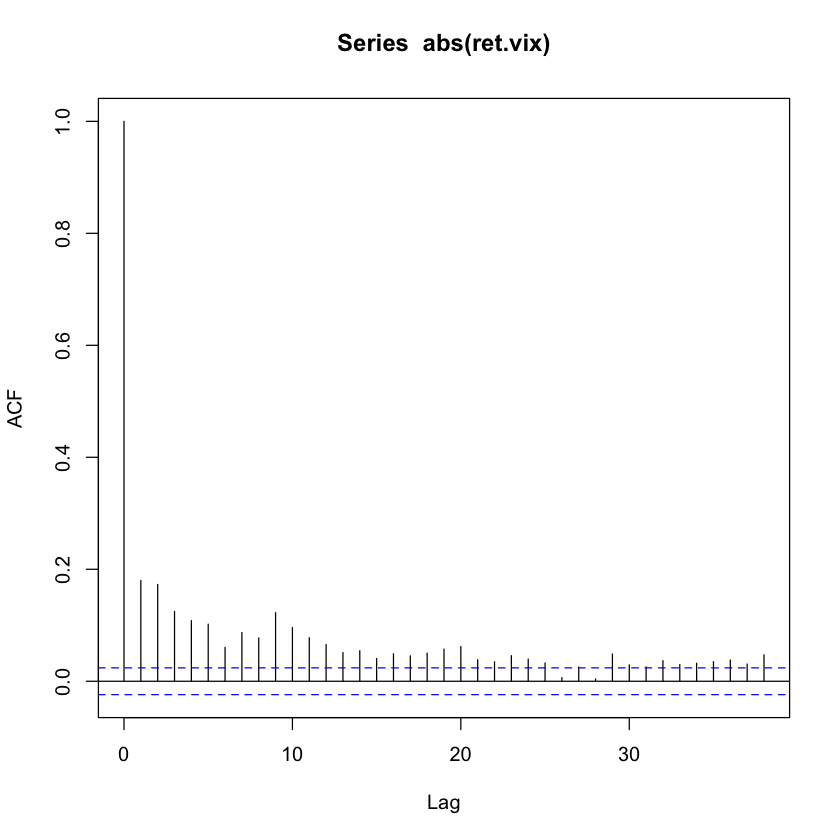

In [19]:
acf(abs(ret.vix))

#### 7. (8 points) 

DAX is a German stock index analogous to the SPX index.  VDAX is the volatility index (VIX) of DAX.

(a) Using the lecture code as a template, use the quantmod package to download time series of DAX and VDAX.

(b) Regress VDAX log returns vs DAX log returns. What is the $R^2$ of this regression? What is the correlation? 

(c) Draw a scatter plot of VDAX log returns vs DAX log returns. Superimpose your linear fit from part (b) to make a diagram exactly like Figure 12 of Lecture 1.

In [20]:
#(a)
library(xts)
library(zoo)
library(quantmod)
library(boot)
#Get SPX and VIX data from Yahoo!
options("getSymbols.warning4.0"=FALSE)
getSymbols("DAX",from="1927-01-01") 
getSymbols("^VDAX",from="1927-01-01") 

mm <- specifyModel(Cl(DAX)~Cl(VDAX))
Data <-modelData(mm) #quantmod function automatically aligns data from two series
head(Data)


Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "DAX"

Warning message:
“^VDAX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”

[1] "VDAX"

           Cl.DAX Cl.VDAX
2014-10-23 25.250   17.80
2014-10-24 25.190   18.43
2014-10-27 25.028   19.78
2014-10-28 25.510   17.83
2014-10-29 25.670   17.55
2014-10-30 25.390   17.45

In [21]:
#(b)
dax <- Data[,"Cl.DAX"]
vdax <- Data[,"Cl.VDAX"]

ret.dax <- log(dax/lag(dax))
ret.dax <- ret.dax[!is.na(ret.dax)]
ret.vdax <- log(vdax/lag(vdax))
ret.vdax <- ret.vdax[!is.na(ret.vdax)]

lm7 = lm(ret.vdax ~ ret.dax)
rsquared = summary(lm7)$r.squared

R-Squared and correlation coefficient are



In [22]:
rsquared
corr = cor(ret.vdax, ret.dax)
corr

[1] 0.2405073

,Cl.DAX
Cl.VDAX,-0.4904154


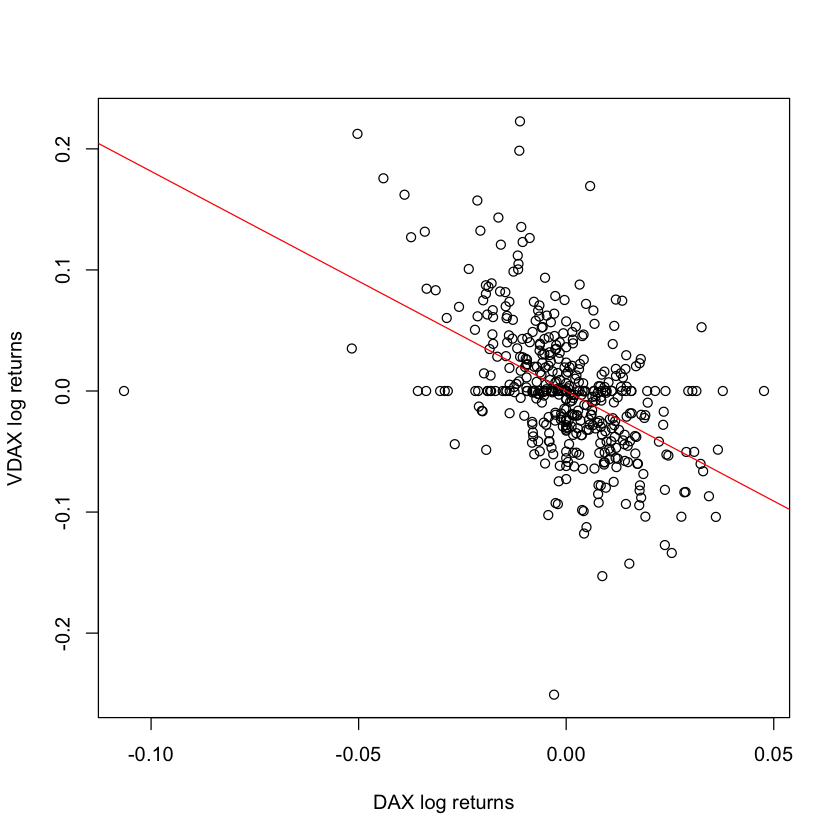

In [23]:
#(c)
plot(as.numeric(ret.dax), as.numeric(ret.vdax), xlab = "DAX log returns", ylab = "VDAX log returns" )
abline(lm7, col = 'red')